<a href="https://colab.research.google.com/github/Khushi15a/Rubicon_Project/blob/main/Project_Netflix_Binge_Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from sklearn.cluster import KMeans


In [ ]:

# 1. Load Dataset

print("\n🟢 Loading Viewing History Dataset...")
df = pd.read_csv("/large_viewing_history.csv")
print("First 5 Rows of Raw Data:\n", df.head())



🟢 Loading Viewing History Dataset...
First 5 Rows of Raw Data:
          Date                       Title
0  2025-04-13  Stranger Things: Episode 8
1  2025-06-29          Narcos: Episode 11
2  2025-04-03          Friends: Episode 5
3  2025-01-15             Dark: Episode 4
4  2025-04-17            Dark: Episode 18


In [ ]:

# 2. Preprocessing

print("\n🟢 Cleaning and Preprocessing Data...")

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df[df['Title'].notnull()]
df.dropna(subset=['Date'], inplace=True)
print("After Cleaning Null Values:\n", df.head())



🟢 Cleaning and Preprocessing Data...
After Cleaning Null Values:
         Date                       Title             Show     Episode  \
0 2025-04-13  Stranger Things: Episode 8  Stranger Things   Episode 8   
1 2025-06-29          Narcos: Episode 11           Narcos  Episode 11   
2 2025-04-03          Friends: Episode 5          Friends   Episode 5   
3 2025-01-15             Dark: Episode 4             Dark   Episode 4   
4 2025-04-17            Dark: Episode 18             Dark  Episode 18   

   WatchMinutes         Day       Week  
0            30  2025-04-13 2025-04-07  
1            30  2025-06-29 2025-06-23  
2            30  2025-04-03 2025-03-31  
3            30  2025-01-15 2025-01-13  
4            30  2025-04-17 2025-04-14  


In [ ]:

# -------------------------------
# 3. Extract Show and Episode
# -------------------------------
def split_title(title):
    if ':' in title:
        parts = title.split(':', 1)
        return parts[0].strip(), parts[1].strip()
    else:
        return title.strip(), 'Movie'

df[['Show', 'Episode']] = df['Title'].apply(lambda x: pd.Series(split_title(x)))
print("\n🎭 Extracted Shows and Episodes:\n", df[['Title', 'Show', 'Episode']].head())



🎭 Extracted Shows and Episodes:
                         Title             Show     Episode
0  Stranger Things: Episode 8  Stranger Things   Episode 8
1          Narcos: Episode 11           Narcos  Episode 11
2          Friends: Episode 5          Friends   Episode 5
3             Dark: Episode 4             Dark   Episode 4
4            Dark: Episode 18             Dark  Episode 18


In [ ]:

# -------------------------------
# 4. Assign Watch Duration
# -------------------------------
print("\n⏱️ Assigning Watch Durations...")
df['WatchMinutes'] = np.where(df['Episode'] == 'Movie', 90, 30)
print("Watch Durations Added:\n", df[['Show', 'Episode', 'WatchMinutes']].head())



⏱️ Assigning Watch Durations...
Watch Durations Added:
               Show     Episode  WatchMinutes
0  Stranger Things   Episode 8            30
1           Narcos  Episode 11            30
2          Friends   Episode 5            30
3             Dark   Episode 4            30
4             Dark  Episode 18            30


In [ ]:

# -------------------------------
# 5. Analyze Daily Watch Time
# -------------------------------
print("\n📅 Calculating Daily Watch Time...")
df['Day'] = df['Date'].dt.date
daily_watch = df.groupby('Day')['WatchMinutes'].sum()
print("Daily Watch Summary:\n", daily_watch.head(10))



📅 Calculating Daily Watch Time...
Daily Watch Summary:
 Day
2025-01-01    450
2025-01-02    270
2025-01-03    270
2025-01-04    180
2025-01-05    270
2025-01-06    300
2025-01-07    150
2025-01-08    450
2025-01-09    240
2025-01-10    210
Name: WatchMinutes, dtype: int64


In [ ]:

# -------------------------------
# 6. Find Binge Days (3+ episodes)
# -------------------------------
binge_days = daily_watch[daily_watch >= 180]
print("\n🔥 Binge Watching Days (180+ mins):\n", binge_days)



🔥 Binge Watching Days (180+ mins):
 Day
2025-01-01    450
2025-01-02    270
2025-01-03    270
2025-01-04    180
2025-01-05    270
             ... 
2025-06-22    300
2025-06-26    330
2025-06-27    390
2025-06-28    270
2025-06-29    330
Name: WatchMinutes, Length: 127, dtype: int64


In [ ]:

# -------------------------------
# 7. Top Watched Shows
# -------------------------------
top_shows = df['Show'].value_counts().head(10)
print("\n🏆 Top 10 Watched Shows:\n", top_shows)



🏆 Top 10 Watched Shows:
 Show
Money Heist        85
Narcos             83
BoJack Horseman    82
The Office         81
Breaking Bad       79
Black Mirror       77
Stranger Things    74
Dark               73
Friends            70
The Crown          69
Name: count, dtype: int64



📊 Plotting Daily Watch Time Over Time...


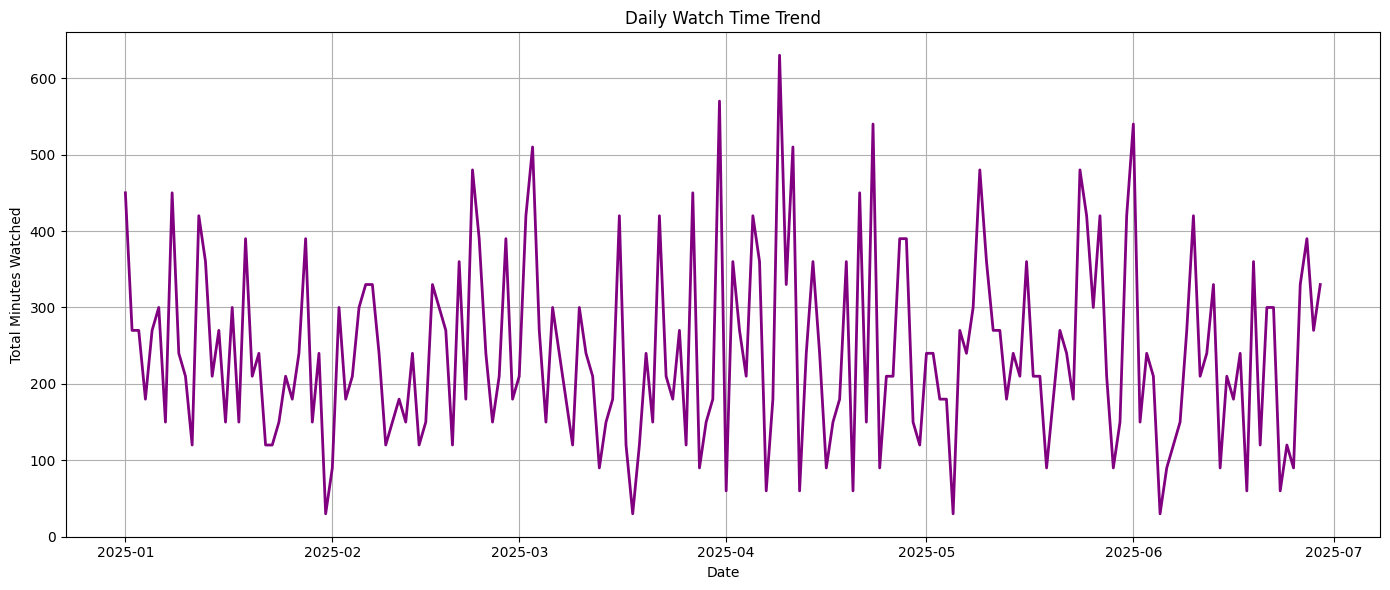

In [ ]:

# -------------------------------
# 8. Visualization - Daily Watch Trend
# -------------------------------
print("\n📊 Plotting Daily Watch Time Over Time...")
plt.figure(figsize=(14, 6))
daily_watch.plot(color='purple', linewidth=2)
plt.title("Daily Watch Time Trend")
plt.xlabel("Date")
plt.ylabel("Total Minutes Watched")
plt.grid(True)
plt.tight_layout()
plt.show()



🥧 Plotting Top 10 Shows Pie Chart...


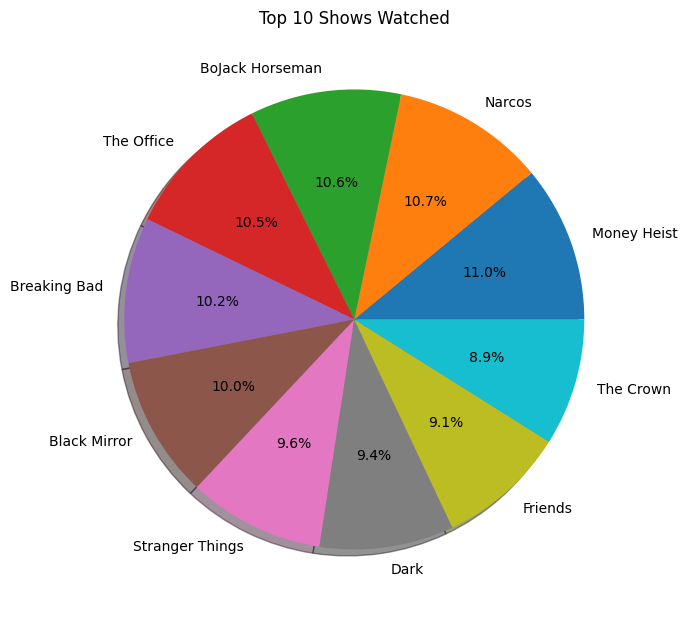

In [ ]:

# -------------------------------
# 9. Pie Chart - Top Shows
# -------------------------------
print("\n🥧 Plotting Top 10 Shows Pie Chart...")
plt.figure(figsize=(7, 7))
top_shows.plot.pie(autopct='%1.1f%%', shadow=True)
plt.title("Top 10 Shows Watched")
plt.ylabel("")
plt.tight_layout()
plt.show()



📆 Analyzing Weekly Watch Patterns...
Weekly Watch Summary:
 Week
2024-12-30    1440
2025-01-06    1890
2025-01-13    1830
2025-01-20    1230
2025-01-27    1440
Name: WatchMinutes, dtype: int64


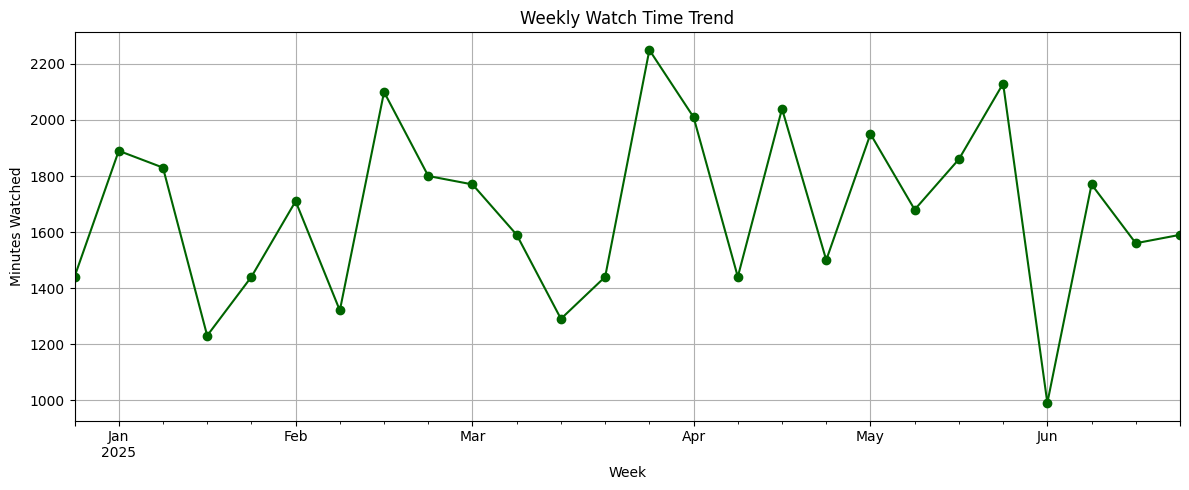

In [ ]:

# -------------------------------
# 10. Weekly Analysis
# -------------------------------
print("\n📆 Analyzing Weekly Watch Patterns...")
df['Week'] = df['Date'].dt.to_period('W').apply(lambda r: r.start_time)
weekly_watch = df.groupby('Week')['WatchMinutes'].sum()
print("Weekly Watch Summary:\n", weekly_watch.head())

plt.figure(figsize=(12, 5))
weekly_watch.plot(marker='o', color='darkgreen')
plt.title("Weekly Watch Time Trend")
plt.xlabel("Week")
plt.ylabel("Minutes Watched")
plt.tight_layout()
plt.grid(True)
plt.show()



🤖 Clustering Daily Patterns using KMeans...
Clustered Daily Watch Data:
          Date  WatchMinutes  Cluster
0  2025-01-01           450        0
1  2025-01-02           270        2
2  2025-01-03           270        2
3  2025-01-04           180        1
4  2025-01-05           270        2


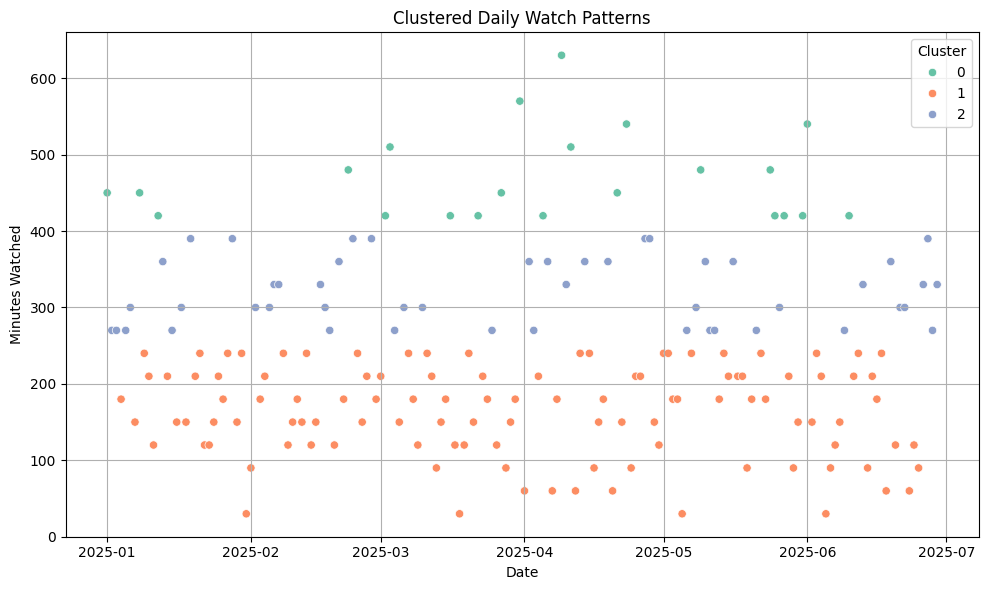

In [ ]:

# -------------------------------
# 11. Clustering Watch Patterns
# -------------------------------
print("\n🤖 Clustering Daily Patterns using KMeans...")
X = daily_watch.values.reshape(-1, 1)
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
labels = kmeans.labels_

daily_clustered = pd.DataFrame({
    'Date': daily_watch.index,
    'WatchMinutes': daily_watch.values,
    'Cluster': labels
})
print("Clustered Daily Watch Data:\n", daily_clustered.head())

plt.figure(figsize=(10, 6))
sns.scatterplot(data=daily_clustered, x='Date', y='WatchMinutes', hue='Cluster', palette='Set2')
plt.title("Clustered Daily Watch Patterns")
plt.xlabel("Date")
plt.ylabel("Minutes Watched")
plt.legend(title='Cluster')
plt.tight_layout()
plt.grid(True)
plt.show()


In [ ]:

# -------------------------------
# 12. Longest Streaks
# -------------------------------
print("\n📈 Calculating Longest Watch Streak...")
df_sorted = df.sort_values('Date')
dates = df_sorted['Day'].drop_duplicates().tolist()

streak = longest = 1
for i in range(1, len(dates)):
    if (dates[i] - dates[i - 1]).days == 1:
        streak += 1
        longest = max(longest, streak)
    else:
        streak = 1

print(f"🔥 Longest Consecutive Watch Streak: {longest} Days")

print("\n🎉 Netflix Binge Analysis Complete!")



📈 Calculating Longest Watch Streak...
🔥 Longest Consecutive Watch Streak: 180 Days

🎉 Netflix Binge Analysis Complete!
